In [1]:
from tnia.plotting.plt_helper import mask_overlay
from skimage.io import imread, imsave
import os
import glob
from segment_everything.detect_and_segment import segment_from_stacked_labels
from segment_everything.prompt_generator import YoloDetector
from segment_everything.weights_helper import get_weights_path
from segment_everything.stacked_labels import StackedLabels
from segment_everything.detect_and_segment import segment_from_stacked_labels



c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
C:\Users\bnort\work\ImageJ2022\tnia\segment-everything\src\segment_everything\vendored\efficientvit\models\nn\ops.py:407: FutureWa

In [2]:
def mobilesam_predict(image):
    conf = 0.3
    iou = 0.8
    imagesz = 1024

    yolo_detecter = YoloDetector(str(get_weights_path("ObjectAwareModel")), "ObjectAwareModelFromMobileSamV2", device='cuda')

    results = yolo_detecter.get_results(image, conf=conf, iou= iou, imgsz=imagesz, max_det=10000)
    bbs=results[0].boxes.xyxy.cpu().numpy()
    stacked_labels = StackedLabels.from_yolo_results(bbs, None, image)
    segmented_stacked_labels = segment_from_stacked_labels(stacked_labels, "MobileSamV2")
    segmented_stacked_labels.sort_largest_to_smallest()
    labels = segmented_stacked_labels.make_2d_labels(type="min")

    return labels

In [7]:
parent_path = r"D:\images\tnia-python-images\imagesc\2025_05_22_Blood_Cells"
im_path = os.path.join(parent_path, "archive", "select", "images")
im_path = r"D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select"

# get all jpg files in the directory

im_files = glob.glob(os.path.join(im_path, "*.jpg"))

ims = []
titles = []

for im_file in im_files:    
    print(f"Processing {im_file}")
    im = imread(im_file)
    
    seg = mobilesam_predict(im)
    
    overlay = mask_overlay(im, seg)
    imsave(im_file.replace(".jpg", f"_seg_microsam.png"), overlay)
    ims.append(im)
    titles.append(os.path.basename(im_file).split("_jpg")[0])
    ims.append(overlay)
    titles.append(os.path.basename(im_file).split("_jpg")[0] + "_seg_mobilesam")

Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BA_1223.jpg



0: 1024x1024 29 objects, 51.0ms
Speed: 7.0ms preprocess, 51.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BA_1581.jpg



0: 1024x1024 26 objects, 85.5ms
Speed: 7.0ms preprocess, 85.5ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BA_2035.jpg



0: 1024x1024 23 objects, 52.4ms
Speed: 7.0ms preprocess, 52.4ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BA_47.jpg



0: 1024x1024 24 objects, 49.0ms
Speed: 7.0ms preprocess, 49.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BA_580.jpg



0: 1024x1024 20 objects, 48.1ms
Speed: 7.9ms preprocess, 48.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BNE_29625.jpg



0: 1024x1024 26 objects, 50.0ms
Speed: 8.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BNE_6747.jpg



0: 1024x1024 24 objects, 94.9ms
Speed: 7.0ms preprocess, 94.9ms inference, 5.1ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BNE_7119.jpg



0: 1024x1024 22 objects, 50.0ms
Speed: 10.0ms preprocess, 50.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BNE_715.jpg



0: 1024x1024 21 objects, 50.0ms
Speed: 7.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\BNE_7323.jpg



0: 1024x1024 25 objects, 49.1ms
Speed: 7.0ms preprocess, 49.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_24569.jpg



0: 1024x1024 26 objects, 50.1ms
Speed: 6.9ms preprocess, 50.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_2603.jpg



0: 1024x1024 24 objects, 50.1ms
Speed: 7.0ms preprocess, 50.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_2683.jpg



0: 1024x1024 25 objects, 49.0ms
Speed: 9.0ms preprocess, 49.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_27.jpg



0: 1024x1024 35 objects, 50.0ms
Speed: 7.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_421.jpg



0: 1024x1024 24 objects, 50.0ms
Speed: 9.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_442.jpg



0: 1024x1024 36 objects, 48.1ms
Speed: 8.9ms preprocess, 48.1ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\EO_708.jpg



0: 1024x1024 21 objects, 49.1ms
Speed: 7.0ms preprocess, 49.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\IG_504355.jpg



0: 1024x1024 18 objects, 49.0ms
Speed: 8.0ms preprocess, 49.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\IG_505197.jpg



0: 1024x1024 25 objects, 45.0ms
Speed: 7.9ms preprocess, 45.0ms inference, 5.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\IG_578806.jpg



0: 1024x1024 25 objects, 49.1ms
Speed: 7.0ms preprocess, 49.1ms inference, 5.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\IG_584719.jpg



0: 1024x1024 20 objects, 49.0ms
Speed: 7.0ms preprocess, 49.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\IG_602322.jpg



0: 1024x1024 17 objects, 50.0ms
Speed: 9.0ms preprocess, 50.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\MO_37056.jpg



0: 1024x1024 33 objects, 51.0ms
Speed: 8.0ms preprocess, 51.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\MO_37507.jpg



0: 1024x1024 20 objects, 51.0ms
Speed: 7.0ms preprocess, 51.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\MO_56409.jpg



0: 1024x1024 26 objects, 49.0ms
Speed: 8.0ms preprocess, 49.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\MO_62355.jpg



0: 1024x1024 19 objects, 50.0ms
Speed: 7.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\MO_9059.jpg



0: 1024x1024 6 objects, 50.0ms
Speed: 7.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\MO_96448.jpg



0: 1024x1024 27 objects, 49.0ms
Speed: 7.0ms preprocess, 49.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_344.jpg



0: 1024x1024 22 objects, 48.0ms
Speed: 8.0ms preprocess, 48.0ms inference, 5.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_5330.jpg



0: 1024x1024 21 objects, 49.0ms
Speed: 8.0ms preprocess, 49.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_5534.jpg



0: 1024x1024 29 objects, 49.1ms
Speed: 7.0ms preprocess, 49.1ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_5911.jpg



0: 1024x1024 16 objects, 49.1ms
Speed: 7.0ms preprocess, 49.1ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_699874.jpg



0: 1024x1024 21 objects, 49.0ms
Speed: 8.0ms preprocess, 49.0ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_705093.jpg



0: 1024x1024 11 objects, 49.0ms
Speed: 7.0ms preprocess, 49.0ms inference, 5.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_727615.jpg



0: 1024x1024 24 objects, 44.0ms
Speed: 9.0ms preprocess, 44.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_733800.jpg



0: 1024x1024 22 objects, 48.6ms
Speed: 7.0ms preprocess, 48.6ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_906910.jpg



0: 1024x1024 6 objects, 48.6ms
Speed: 8.0ms preprocess, 48.6ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully
Processing D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select\PLATELET_984573.jpg



0: 1024x1024 27 objects, 50.0ms
Speed: 7.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


VIT checkpoint loaded successfully


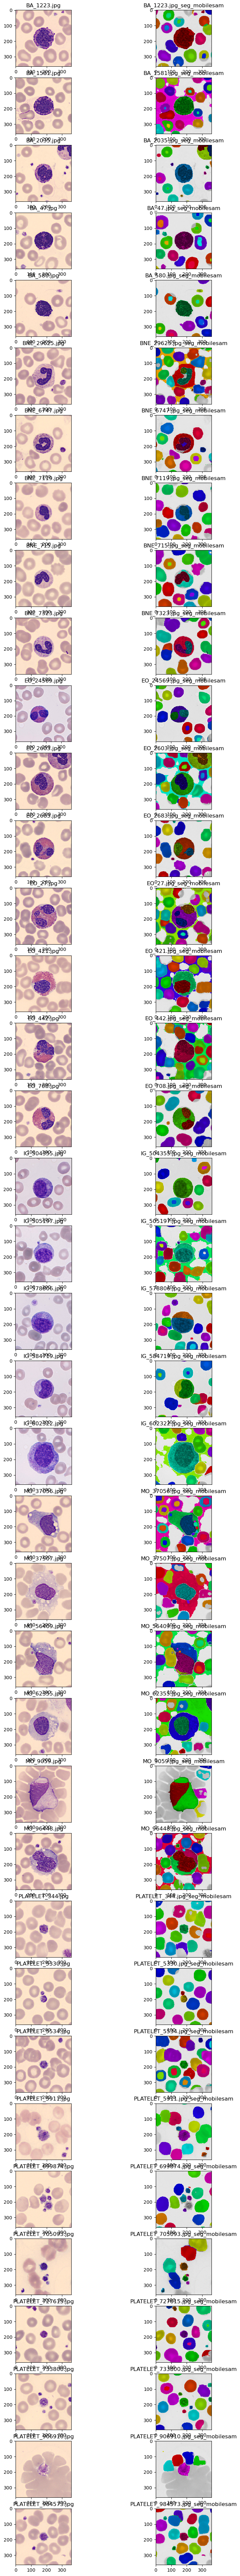

In [8]:
from tnia.plotting.plt_helper import imshow_multi2d


fig = imshow_multi2d(ims, titles, len(im_files), 2, width=10, height=100)